<H1> Introduction  </H1>

The goal of our project is to try to predict which team is going to win a football game.
One particular thing about this project is that, it focuses on finding if a team is going to win at half time, it means that we want to know considering the half time score and all the informations we have which team is going to win. Does it make our model irrelevant ? First a lot of things could happen during the second half of a game, and with today's technology it is still possible to use those predictions to make bets at half time. <br>
To find a model we will need first to process the data we gathered from https://www.football-data.co.uk, and then we will need to find the best model precision-wised.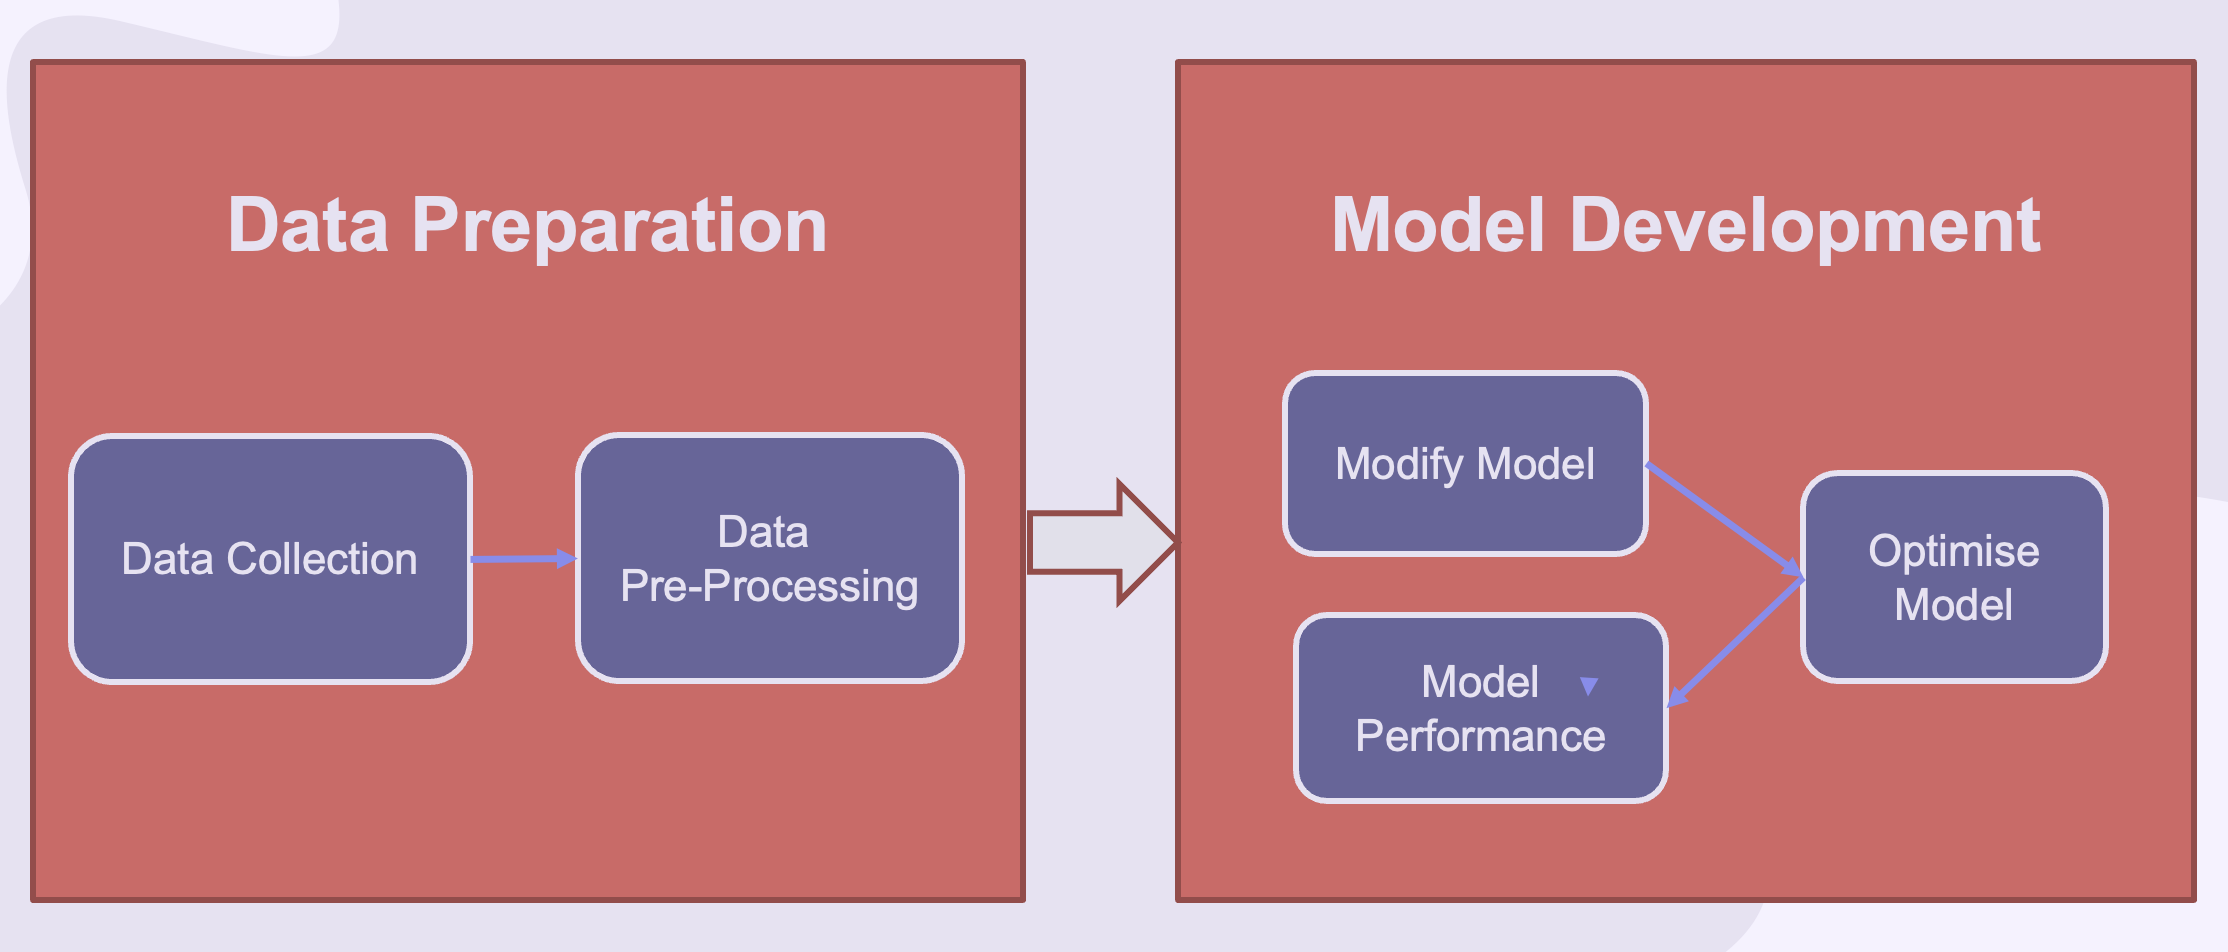
    

<h1> Part 0 : Data Collection </h1>

<h4> This part is solely informative, we could not import all those files with the project as it was too heavy for uploading </h4>
<br>
The first step is to download every data we can on the 5 majors european football championship : The Premier League in England, Serie A in Italy, Bundesliga in Germany, Ligue 1 in France and finaly the Liga in Spain. 
<br>
<br>
We gathered those data from https://www.football-data.co.uk. Those data are separated for each chamionship and each seasons, so we need to unify all those files into one unique CSV.


You will find more details in the **'Unify_All_Datasets.ipynb'** file on how we went about unifying this data in a unique dataset.

Finally we obtain a dataset containing 29123 rows and 31 columns

<H1> Part 1 : Data Processing </H1>

Import the <global_dataset.csv>  dataset from your working directory  
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv('global_dataset.csv')
df = df.drop('Unnamed: 0', axis = 1) #we drop unecessary column
df.shape #Get it's shape

(29123, 31)

In [2]:
df.info() #We see some categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29123 entries, 0 to 29122
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      29115 non-null  object 
 1   HomeTeam  29115 non-null  object 
 2   AwayTeam  29115 non-null  object 
 3   FTHG      29115 non-null  float64
 4   FTAG      29115 non-null  float64
 5   FTR       29115 non-null  object 
 6   HTHG      29112 non-null  float64
 7   HTAG      29112 non-null  float64
 8   HTR       29112 non-null  object 
 9   HS        29098 non-null  float64
 10  AS        29098 non-null  float64
 11  HY        29112 non-null  float64
 12  AY        29113 non-null  float64
 13  HR        29113 non-null  float64
 14  AR        29113 non-null  float64
 15  B365H     29105 non-null  float64
 16  B365D     29105 non-null  float64
 17  B365A     29105 non-null  float64
 18  BWH       29094 non-null  float64
 19  BWD       29094 non-null  float64
 20  BWA       29094 non-null  fl

In [3]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,League
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,3.0,...,2.1,3.0,3.1,2.20,3.2,2.80,2.20,3.25,3.10,Premier League
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,10.0,...,3.8,3.1,1.8,4.33,3.2,1.72,4.50,3.30,1.80,Premier League
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,15.0,...,2.2,3.0,2.9,2.30,3.2,2.62,2.35,3.25,2.80,Premier League
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,15.0,...,1.7,3.2,4.2,1.70,3.3,4.33,1.75,3.25,5.00,Premier League
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,4.0,...,2.5,3.0,2.5,2.75,3.1,2.30,2.80,3.25,2.35,Premier League


<h3> Data Visualisation </h3>

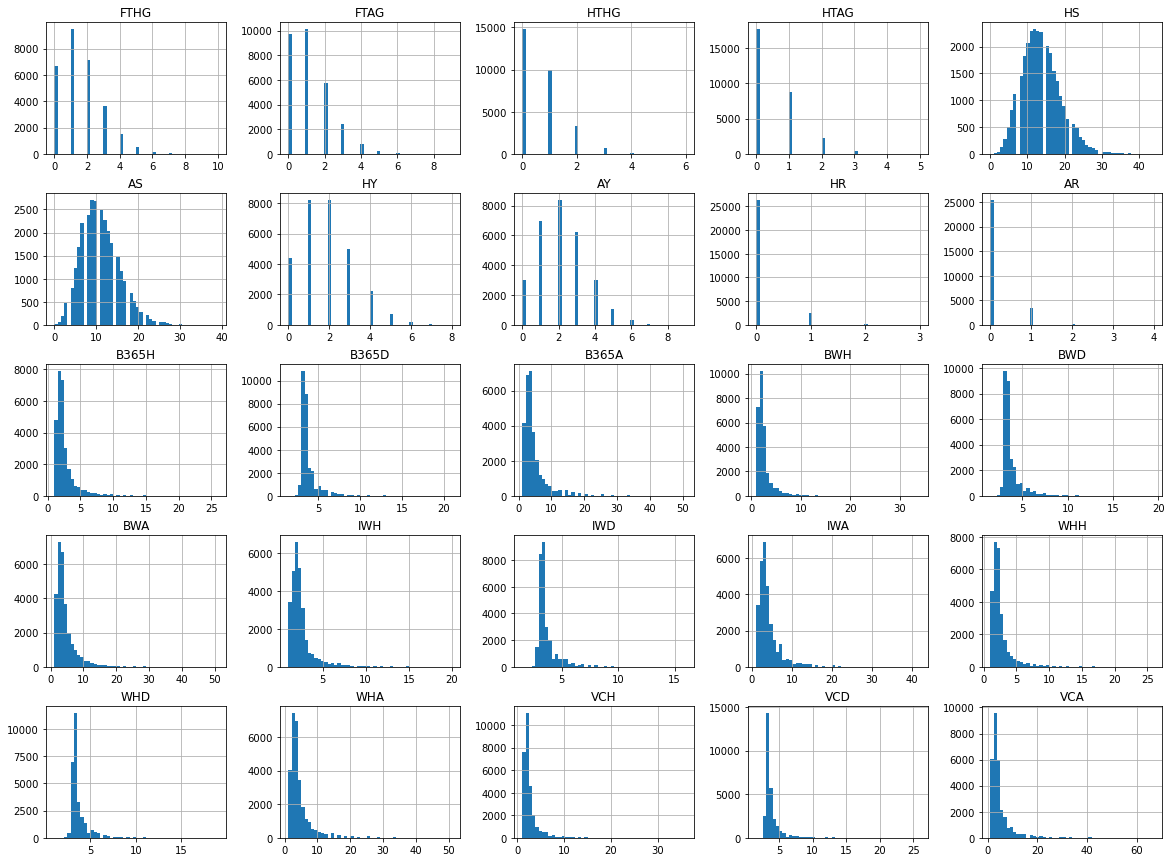

In [4]:
#Some cool data visualisation 

df.hist(bins=50, figsize=(20,15))
plt.show()

<h4> Our goal is to predict if a game is going to be a Win, Draw, or Lost </h4>
So let's try to find if our data is correctly balanced

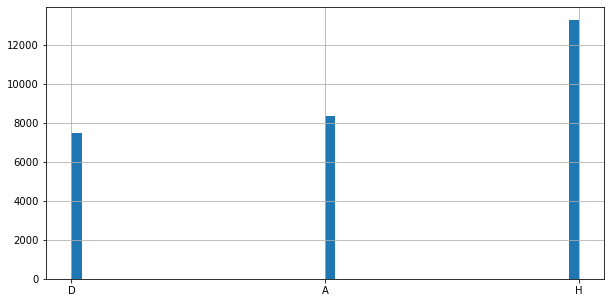

In [5]:
#In the FTR column, A : Away team wins , D : Draw , H : Home Team wins

df['FTR'].hist(bins=50, figsize=(10,5))
plt.show()

#It seems that we are not facing an imbalance problem at first glance

<h4> Let's see the correlation matrix </h4>

In [6]:
# We need to check correlation between quantitative features 
df.corr()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HY,AY,HR,AR,...,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA
FTHG,1.000000,-0.059168,0.685337,-0.017509,0.260305,-0.072571,-0.106898,0.000282,-0.085899,0.095014,...,0.346020,-0.247689,0.253431,0.346542,-0.241805,0.254769,0.341073,-0.236231,0.259402,0.337688
FTAG,-0.059168,1.000000,-0.036208,0.682660,-0.059835,0.285536,0.090300,-0.029490,0.127789,-0.067442,...,-0.215906,0.304167,-0.037540,-0.216501,0.299011,-0.034537,-0.208774,0.295854,-0.037888,-0.201867
HTHG,0.685337,-0.036208,1.000000,-0.028088,0.093987,0.009480,-0.080238,-0.003696,-0.041565,0.040777,...,0.237977,-0.174447,0.173154,0.239369,-0.169349,0.173653,0.233653,-0.165331,0.178125,0.233910
HTAG,-0.017509,0.682660,-0.028088,1.000000,0.021763,0.131923,0.078851,-0.015456,0.076158,-0.017456,...,-0.146918,0.216836,-0.018894,-0.145957,0.211024,-0.017602,-0.141181,0.209262,-0.020859,-0.136770
HS,0.260305,-0.059835,0.093987,0.021763,1.000000,-0.249138,-0.102542,0.030950,-0.107139,0.099215,...,0.369810,-0.327379,0.230162,0.371389,-0.322362,0.224748,0.363554,-0.313774,0.231217,0.355628
AS,-0.072571,0.285536,0.009480,0.131923,-0.249138,1.000000,0.077653,-0.073350,0.107995,-0.101377,...,-0.295419,0.341574,-0.100282,-0.293611,0.341686,-0.100109,-0.287312,0.333937,-0.097281,-0.276828
HY,-0.106898,0.090300,-0.080238,0.078851,-0.102542,0.077653,1.000000,0.219515,0.101782,0.085277,...,-0.166796,0.107813,-0.110929,-0.165468,0.100354,-0.111326,-0.163033,0.099560,-0.112789,-0.159751
AY,0.000282,-0.029490,-0.003696,-0.015456,0.030950,-0.073350,0.219515,1.000000,0.083582,0.087202,...,-0.001145,-0.082698,-0.054989,-0.003263,-0.083610,-0.057438,-0.007011,-0.084431,-0.051396,-0.006052
HR,-0.085899,0.127789,-0.041565,0.076158,-0.107139,0.107995,0.101782,0.083582,1.000000,0.088111,...,-0.053228,0.026837,-0.048174,-0.051893,0.027396,-0.045698,-0.052398,0.028777,-0.044033,-0.050812
AR,0.095014,-0.067442,0.040777,-0.017456,0.099215,-0.101377,0.085277,0.087202,0.088111,1.000000,...,-0.006299,-0.037155,-0.040489,-0.008946,-0.038155,-0.037810,-0.011062,-0.037297,-0.035290,-0.008009


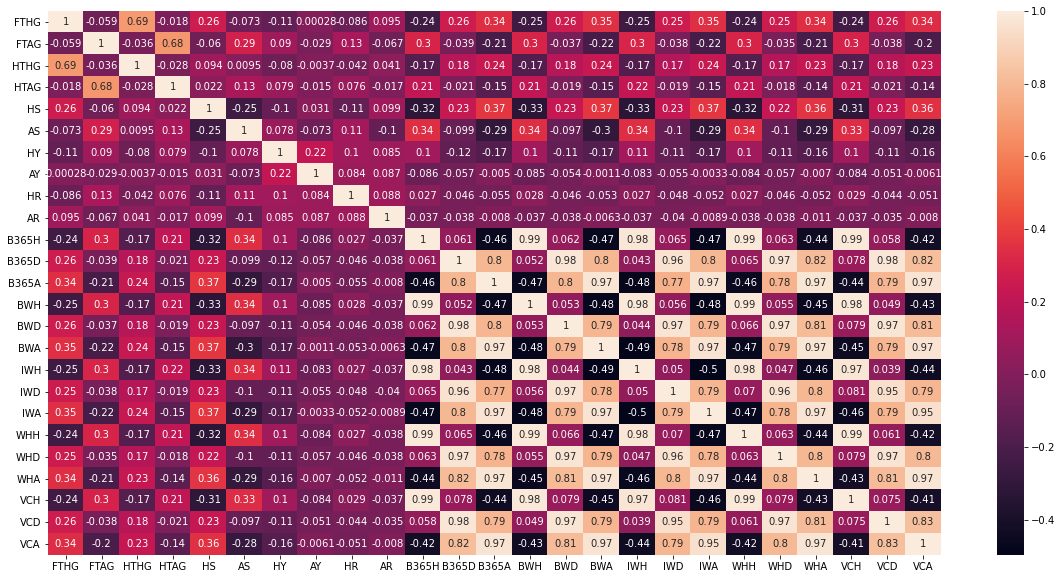

In [7]:
# Because there are many columns with quantitative values, it's hard to see only with corr() function which one are related
# We use a correlation heatmap to see if they are correlation between features 
import seaborn as sb

plt.figure(figsize=[20,10],facecolor='white')
sb.heatmap(df.corr(),annot=True)
plt.show()

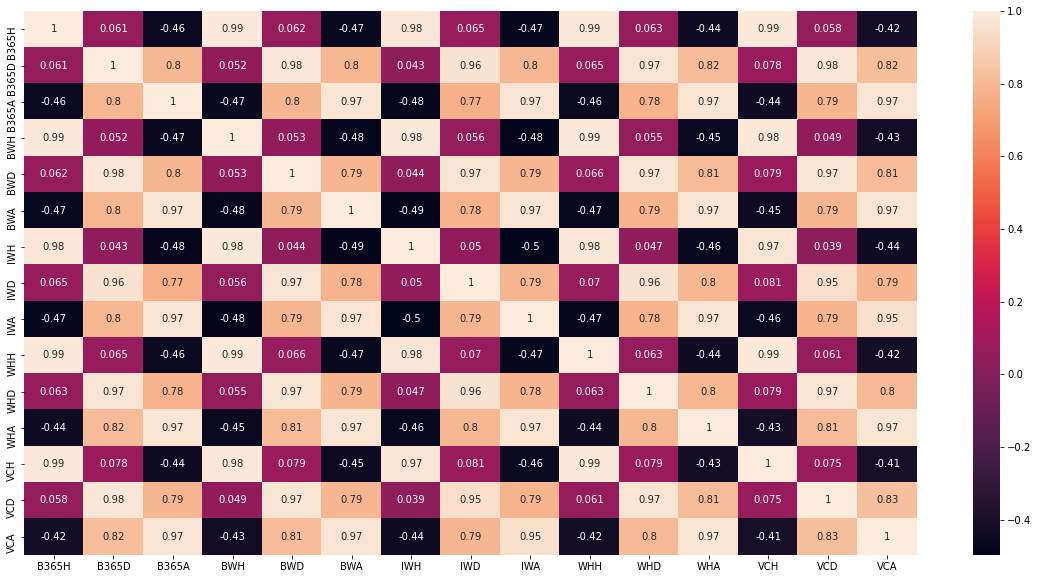

In [8]:
# We see that there are many values that are significantly correlated, especially odds, 
#Let's focus on this side of the square
corr_l = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']

plt.figure(figsize=[20,10],facecolor='white')
sb.heatmap(df[corr_l].corr(),annot=True)
plt.show()



<h3> Data-Processing : Data Cleaning </h3>


In [9]:
df.isna().sum() #We see that there are some missing values

Date          8
HomeTeam      8
AwayTeam      8
FTHG          8
FTAG          8
FTR           8
HTHG         11
HTAG         11
HTR          11
HS           25
AS           25
HY           11
AY           10
HR           10
AR           10
B365H        18
B365D        18
B365A        18
BWH          29
BWD          29
BWA          29
IWH          60
IWD          60
IWA          60
WHH         547
WHD         547
WHA         547
VCH          86
VCD          87
VCA          86
League        0
dtype: int64

In [10]:
# Two solutions : first one we think that it is ok to throw the row since our dataset is quite big, let's check
#if our dataset is big enough

df.isna().sum()/len(df) * 100 

#We see that at max it affects only 1-2% of our dataset, it is ok to throw everything 

df1 = df.dropna()

len(df1)/len(df) *100
#We kept 97.6% of our dataset, so everything is fine let's move on
df1 = df1.reset_index()
df = df1.drop('index', axis = 1)
df.isna().sum() #Not a single NaN value


Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
BWH         0
BWD         0
BWA         0
IWH         0
IWD         0
IWA         0
WHH         0
WHD         0
WHA         0
VCH         0
VCD         0
VCA         0
League      0
dtype: int64

Now the df is the dataframe we are going to work with



<h3> Then let's deal with the outliers : </h3>



In [11]:
# Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers
# First we will calculate IQR
df_o = df.copy()

Q1 = df_o.quantile(0.05)
Q3 = df_o.quantile(0.95)
IQR = Q3 - Q1
IQR
# Here we will get IQR for each column.

FTHG      4.00
FTAG      3.00
HTHG      2.00
HTAG      2.00
HS       17.00
AS       15.00
HY        4.00
AY        5.00
HR        1.00
AR        1.00
B365H     4.75
B365D     3.00
B365A    10.43
BWH       4.75
BWD       3.05
BWA       9.45
IWH       4.25
IWD       2.60
IWA       8.43
WHH       4.75
WHD       2.60
WHA       9.43
VCH       4.75
VCD       3.25
VCA      10.45
dtype: float64

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
"""
The below code will give an output with some true and false values. 
The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
"""
df_o = (df_o < (Q1 - 1.5 * IQR)) | (df_o > (Q3 + 1.5 * IQR))
df_o.head()

,AR,AS,AY,AwayTeam,B365A,B365D,B365H,BWA,BWD,BWH,...,IWA,IWD,IWH,League,VCA,VCD,VCH,WHA,WHD,WHH
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
"""
Now that we know how to detect the outliers, it is important to understand if they needs to be removed or corrected.
We can use previously calculated IQR score to filter out the outliers by keeping only valid values.
"""

df_o = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df_o.head()

(28432, 31)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,League
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,3.0,...,2.1,3.0,3.1,2.20,3.2,2.80,2.20,3.25,3.10,Premier League
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,10.0,...,3.8,3.1,1.8,4.33,3.2,1.72,4.50,3.30,1.80,Premier League
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,15.0,...,2.2,3.0,2.9,2.30,3.2,2.62,2.35,3.25,2.80,Premier League
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,15.0,...,1.7,3.2,4.2,1.70,3.3,4.33,1.75,3.25,5.00,Premier League
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,4.0,...,2.5,3.0,2.5,2.75,3.1,2.30,2.80,3.25,2.35,Premier League


We did this step because this is the usual path to follow with data pre-processing, however this dataset will not be used because here outliers are good for our model. Indeed, if a bookie is setting a very high odd on a team, it means that there are very low probability that they will win, thus outliers are going to improve our results



<h3> Then let's focus on the categorical values  : </h3>



In [15]:
#Now let's focus on the categorical values
#There are few ones :

df1 = df.copy()

cat_val = ['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'League']

#First we are going to treat the Date Column, we would like only to keep the month and the year

month = []
year = []

for i in range (len(df1['Date'])) : 
    month.append(int(df1['Date'].iloc[i][3:5])) 
    #We check if the format of the date is 'dd/mm/yyyy' or 'dd/mm/yy'
    if len(df1['Date'].iloc[i][6:]) == 2 : 
        year.append(int(df1['Date'].iloc[i][6:9]))
    elif len(df1['Date'].iloc[i][8:]) == 2 : 
        year.append(int(df1['Date'].iloc[i][8:10]))
     

df1['Month'] = month
df1['Year'] = year
df1 = df1.drop('Date', axis = 1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28432 entries, 0 to 28431
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  28432 non-null  object 
 1   AwayTeam  28432 non-null  object 
 2   FTHG      28432 non-null  float64
 3   FTAG      28432 non-null  float64
 4   FTR       28432 non-null  object 
 5   HTHG      28432 non-null  float64
 6   HTAG      28432 non-null  float64
 7   HTR       28432 non-null  object 
 8   HS        28432 non-null  float64
 9   AS        28432 non-null  float64
 10  HY        28432 non-null  float64
 11  AY        28432 non-null  float64
 12  HR        28432 non-null  float64
 13  AR        28432 non-null  float64
 14  B365H     28432 non-null  float64
 15  B365D     28432 non-null  float64
 16  B365A     28432 non-null  float64
 17  BWH       28432 non-null  float64
 18  BWD       28432 non-null  float64
 19  BWA       28432 non-null  float64
 20  IWH       28432 non-null  fl

In [16]:
#Now we only have ['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'League'] in our cat_value 

cat_val = ['HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'League']

#We are going to check how many categories there is in each column

for x in cat_val : 
    print(x , " : ", len(df1[x].value_counts()))


HomeTeam  :  193
AwayTeam  :  193
FTR  :  3
HTR  :  3
League  :  5


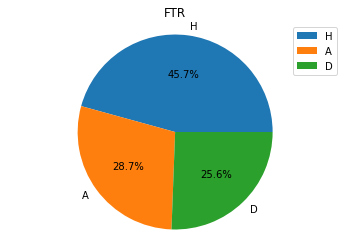

In [17]:
serie = df1['FTR'].value_counts()
labels = list(serie.index.values)
plt.pie(serie, labels = labels,autopct='%1.1f%%')
plt.axis('equal')  
plt.legend()
plt.title(label = 'FTR')
plt.show()  

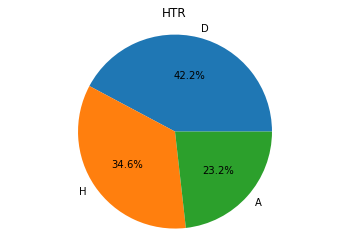

In [18]:
serie = df1['HTR'].value_counts()
labels = list(serie.index.values)
plt.pie(serie, labels = labels,autopct='%1.1f%%')
plt.axis('equal')  
plt.title(label = 'HTR')
plt.show()  

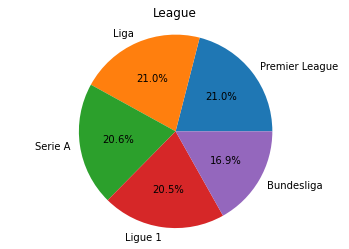

In [19]:
serie = df1['League'].value_counts()
labels = list(serie.index.values)
plt.pie(serie, labels = labels,autopct='%1.1f%%')
plt.axis('equal')  
plt.title(label = 'League')
plt.show()  

In [20]:
#Ok so we see that there is always more than 2 categories in each of those columns

#BUT ONE MAJOR ISSUE, HomeTeam and AwayTeam aswell
#We will change that right now :

df1['HomeTeam'] = df1['HomeTeam'].astype(str) + "_HT"
df1['AwayTeam'] = df1['AwayTeam'].astype(str) + "_AT"

#Now let's use a method called One Hot Encoding seen in class to transform those categorical values into
#numerical ones

HT = pd.get_dummies(df1['HomeTeam'])
AT = pd.get_dummies(df1['AwayTeam'])
League = pd.get_dummies(df1['League'])


df1 = df1.drop(['HomeTeam', 'AwayTeam', 'League'], axis = 1)
df1 = pd.concat([df1, HT, AT, League], axis = 1)

In [21]:
df1.shape #Now our dataset contains 424 columns

(28432, 420)

In [22]:
#We check if there are any categorical values 

for x in list(df1.columns) :
    if df1[x].dtype == object :
        print(x)
        
#Nothing prints everything is numerical !

df = df1.drop(['FTR', 'HTR', 'FTAG', 'FTHG'], axis = 1) #We want to get rid of the final and half time score

y = df1['FTR']

FTR
HTR


In [23]:
df.columns

Index(['HTHG', 'HTAG', 'HS', 'AS', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       ...
       'Wigan_AT', 'Wolfsburg_AT', 'Wolves_AT', 'Xerez_AT', 'Zaragoza_AT',
       'Bundesliga', 'Liga', 'Ligue 1', 'Premier League', 'Serie A'],
      dtype='object', length=416)

<H1> Part 2 : Model </H1>

<h2> 2.1 Scale our dataset </h2>

First we are going to check if our values are within a certain limted range, indeed high values in our dataset
might slow down models and we might waste too much time on training

In [24]:
#First check if all values are within a 0 to 1 range

df.max().max() #We see that the max value is 67
#We are going to scale all the dataset 

df1 = df.copy()

#We are first going to list every columns that have higher values than 1
resize_col = [x for x in df1.columns if df1[x].max() > 1] 
len(resize_col) #There are 23 such columns

25

In [25]:
#Then we are going to use the MinMaxScaler method 

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
resized = mms.fit_transform(df1[resize_col])
resized = pd.DataFrame(resized, columns=resize_col)

#Now we dropped unscaled values
df1 = pd.concat([df1.drop(resize_col, axis=1), pd.DataFrame(resized, columns=resize_col)] , axis = 1)

(df1.max()).max() #everything is inferior to 1

#We can move on with our models 

df = df1


<h2> 2.2 Split the data: train, validate, test </h2>

In [26]:

df1 = df.copy()

y  #Our target value
X = df1

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Then we split our dataset into training and testing 

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, y, test_size = 0.3,random_state=0)



<h2> 2.3 Comparison of different models </h2>

In [27]:
from sklearn.model_selection import GridSearchCV

<h3> Use a Decision Tree Classifier </h3>

In [28]:
from sklearn.tree import DecisionTreeClassifier

<h5> Training  </h5>

In [29]:
dec_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
dec_tree.fit(x_training_data, y_training_data)


DecisionTreeClassifier(max_depth=5, random_state=0)

In [30]:
predictions = dec_tree.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.63      0.65      0.64      2421
           D       0.41      0.39      0.40      2181
           H       0.74      0.74      0.74      3928

    accuracy                           0.63      8530
   macro avg       0.59      0.60      0.59      8530
weighted avg       0.62      0.63      0.63      8530



<h5> Tunning </h5>

In [31]:
params = {'max_depth': list(range(2, 40)), 'min_samples_leaf': list(range(2,20))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), 
                              params, 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1,)

grid_search_cv.fit(x_training_data, y_training_data)

Fitting 3 folds for each of 684 candidates, totalling 2052 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [32]:
grid_search_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 14}

In [33]:
dec_tree = DecisionTreeClassifier( max_depth =  6, min_samples_leaf = 14 )

dec_tree.fit(x_training_data, y_training_data)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=14)

In [34]:
#Predict the response for test dataset
predictions = dec_tree.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.66      0.61      0.64      2421
           D       0.41      0.44      0.42      2181
           H       0.74      0.75      0.75      3928

    accuracy                           0.63      8530
   macro avg       0.60      0.60      0.60      8530
weighted avg       0.63      0.63      0.63      8530



In [35]:
fi = dec_tree.feature_importances_
fi.reshape(-1,1)
fi = pd.DataFrame(fi)

f = X.iloc[0,:]
f = pd.DataFrame(f)
fi = fi.set_index(f.index)
importance_per_feature = pd.concat([f,fi],axis = 1)
importance_per_feature = importance_per_feature.iloc[:,1]
importance_per_feature = importance_per_feature.sort_values(ascending=False)
print(importance_per_feature.head(10))
print("this are the 10 most important feature of the dataset")

HTHG     0.413938
HTAG     0.388912
VCH      0.045999
BWH      0.029322
IWA      0.027338
B365H    0.018265
BWA      0.013882
AR       0.013322
AS       0.011027
VCA      0.010907
Name: 0, dtype: float64
this are the 10 most important feature of the dataset


<h3> Use a Logistic Regression </h3>

In [36]:
from sklearn.linear_model import LogisticRegression

<h5> Training  </h5>

In [37]:
LR = LogisticRegression()
LR.fit(x_training_data, y_training_data)


LogisticRegression()

<h5> Testing </h5>


In [38]:
#Predict the response for test dataset
predictions = LR.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.61      0.66      0.64      2421
           D       0.39      0.22      0.28      2181
           H       0.69      0.82      0.75      3928

    accuracy                           0.62      8530
   macro avg       0.56      0.57      0.56      8530
weighted avg       0.59      0.62      0.60      8530



<h5> Tunning/Training/Testing </h5>

In [39]:
grid={"C":np.logspace(-10, 10, 100), "penalty":["l1","l2"]}

grid_search_cv = GridSearchCV(LR, 
                              grid, 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1,)

grid_search_cv.fit(x_training_data, y_training_data)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-0...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [40]:
grid_search_cv.best_params_

{'C': 0.07742636826811278, 'penalty': 'l2'}

In [41]:
logreg2 =LogisticRegression(C = 0.07742636826811278, penalty =  'l2')

logreg2.fit(x_training_data, y_training_data)



LogisticRegression(C=0.07742636826811278)

In [42]:
predictions = logreg2.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.62      0.67      0.64      2421
           D       0.38      0.16      0.22      2181
           H       0.67      0.85      0.75      3928

    accuracy                           0.62      8530
   macro avg       0.55      0.56      0.54      8530
weighted avg       0.58      0.62      0.58      8530



<h3> Use a Random Forests </h3>

In [43]:
from sklearn.ensemble import RandomForestClassifier


<h5> Training  </h5>

In [44]:
RFR = RandomForestClassifier()
RFR.fit(x_training_data, y_training_data)


RandomForestClassifier()

<h5> Testing </h5>


In [45]:
predictions = RFR.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.60      0.66      0.63      2421
           D       0.41      0.18      0.25      2181
           H       0.67      0.83      0.74      3928

    accuracy                           0.62      8530
   macro avg       0.56      0.56      0.54      8530
weighted avg       0.58      0.62      0.58      8530



<h5> Tunning/Training/Testing </h5>

In [46]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_cv = GridSearchCV(RandomForestClassifier(), 
                              param_grid, 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1,)

grid_search_cv.fit(x_training_data, y_training_data)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [47]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [48]:
RFR_2 = RandomForestClassifier(criterion =  'entropy', 
 max_depth =  8,
 max_features =  'sqrt',
 n_estimators =  200 )
RFR_2.fit(x_training_data, y_training_data)


RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)

In [49]:
predictions = RFR_2.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.57      0.58      0.58      2421
           D       0.38      0.01      0.02      2181
           H       0.58      0.89      0.71      3928

    accuracy                           0.58      8530
   macro avg       0.51      0.50      0.44      8530
weighted avg       0.53      0.58      0.49      8530



<h3> Use a Support Vector Machines </h3>

In [50]:
from sklearn.svm import SVC

<h5> Training  </h5>

In [51]:
SVM = SVC()
SVM.fit(x_training_data, y_training_data)

SVC()

<h5> Testing </h5>


In [52]:
predictions = SVM.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.62      0.64      0.63      2421
           D       0.38      0.21      0.27      2181
           H       0.67      0.82      0.74      3928

    accuracy                           0.61      8530
   macro avg       0.56      0.56      0.55      8530
weighted avg       0.58      0.61      0.59      8530



<h5> Tunning/Training/Testing : Be carefull it takes a lot of time (set on variable to 1 to run it) </h5>

In [53]:
on = 0

if on == 1 :

    param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}


    grid_search_cv = GridSearchCV(SVC(), 
                                  param_grid, 
                                  verbose=1, 
                                  cv=3,
                                  n_jobs = -1,)

    grid_search_cv.fit(x_training_data, y_training_data)

In [54]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [55]:
SVM_2 = RandomForestClassifier(criterion =  'entropy', 
 max_depth =  8,
 max_features =  'sqrt',
 n_estimators =  200 )
SVM_2.fit(x_training_data, y_training_data)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)

In [56]:
predictions = SVM_2.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

              precision    recall  f1-score   support

           A       0.57      0.60      0.59      2421
           D       0.42      0.01      0.02      2181
           H       0.59      0.89      0.71      3928

    accuracy                           0.58      8530
   macro avg       0.53      0.50      0.44      8530
weighted avg       0.54      0.58      0.50      8530



It seems that this model perfoms well, but the time training/optimizing it is a big con for us, thus we will not consider it for our model selection process

<h3> K-Mean Clustering </h3>

In [57]:
from sklearn.cluster import KMeans

#We want to cluster our dataset into 3 distinct clusters

km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state = 0, tol = 1e-04)
y_km = km.fit_predict(X)


In [58]:
#Let's find out how precise is our model 

df['Cluster'] = y.apply(lambda x: 1 if x == 'A' else (2 if x == "D" else 0) ) 
print(classification_report(df['Cluster'], km.labels_))

              precision    recall  f1-score   support

           0       0.45      0.57      0.51     12998
           1       0.28      0.21      0.24      8158
           2       0.24      0.20      0.22      7276

    accuracy                           0.37     28432
   macro avg       0.33      0.33      0.32     28432
weighted avg       0.35      0.37      0.36     28432



<h4> Now we have found that the best models is Decision Tree Classifier </h4>


<H2> 2.4 Now let's compare the results if we train with the outlier dataset </h2>

The goal here is to see if our assumptions were true, do outliers improve our result ? We will try to redo the exact same work as before and compare our results on the Decision Tree Classifier

In [59]:
#Let's redo the work with the outlier dataframe 

#Now let's focus on the categorical values
#There are few ones :

df = pd.read_csv('global_dataset.csv')
df = df.drop('Unnamed: 0', axis = 1) #we drop unecessary column
df.shape #Get it's shape

df_o = df.copy()

Q1 = df_o.quantile(0.05)
Q3 = df_o.quantile(0.95)
IQR = Q3 - Q1

df_o = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_o.columns



Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'VCH',
       'VCD', 'VCA', 'League'],
      dtype='object')

In [60]:
df1 = df_o.dropna()

cat_val = ['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'League']

#First we are going to treat the Date Column, we would like only to keep the month and the year

month = []
year = []

for i in range (len(df1['Date'])) : 
    month.append(int(df1['Date'].iloc[i][3:5])) 
    #We check if the format of the date is 'dd/mm/yyyy' or 'dd/mm/yy'
    if len(df1['Date'].iloc[i][6:]) == 2 : 
        year.append(int(df1['Date'].iloc[i][6:9]))
    elif len(df1['Date'].iloc[i][8:]) == 2 : 
        year.append(int(df1['Date'].iloc[i][8:10]))
     

df1['Month'] = month
df1['Year'] = year
df1 = df1.drop('Date', axis = 1)

df1.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 27966 entries, 0 to 29122
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  27966 non-null  object 
 1   AwayTeam  27966 non-null  object 
 2   FTHG      27966 non-null  float64
 3   FTAG      27966 non-null  float64
 4   FTR       27966 non-null  object 
 5   HTHG      27966 non-null  float64
 6   HTAG      27966 non-null  float64
 7   HTR       27966 non-null  object 
 8   HS        27966 non-null  float64
 9   AS        27966 non-null  float64
 10  HY        27966 non-null  float64
 11  AY        27966 non-null  float64
 12  HR        27966 non-null  float64
 13  AR        27966 non-null  float64
 14  B365H     27966 non-null  float64
 15  B365D     27966 non-null  float64
 16  B365A     27966 non-null  float64
 17  BWH       27966 non-null  float64
 18  BWD       27966 non-null  float64
 19  BWA       27966 non-null  float64
 20  IWH       27966 non-null  fl

In [61]:
#Ok so we see that there is always more than 2 categories in each of those columns

#BUT ONE MAJOR ISSUE, HomeTeam and AwayTeam aswell
#We will change that right now :

df1['HomeTeam'] = df1['HomeTeam'].astype(str) + "_HT"
df1['AwayTeam'] = df1['AwayTeam'].astype(str) + "_AT"

#Now let's use a method called One Hot Encoding seen in class to transform those categorical values into
#numerical ones

HT = pd.get_dummies(df1['HomeTeam'])
AT = pd.get_dummies(df1['AwayTeam'])
League = pd.get_dummies(df1['League'])


df1 = df1.drop(['HomeTeam', 'AwayTeam', 'League'], axis = 1)
df1 = pd.concat([df1, HT, AT, League], axis = 1)

In [62]:
#We check if there are any categorical values 

for x in list(df1.columns) :
    if df1[x].dtype == object :
        print(x)
        

FTR
HTR


In [63]:
#Ok so we see that FTR and HTR are here those represents Full Time Results which we are going to get rid of
#The second one is Half Time Result, as we already have Half Time Goals we can get rid of it aswell

df_o_x = df1.reset_index().drop(['index', 'FTR', 'HTR', 'FTAG', 'FTHG'], axis=1)
df_o_y = df1['FTR']

In [64]:
#First check if all values are within a 0 to 1 range

df_o_x.max().max() #We see that the max value is 67
#We are going to scale all the dataset 

df1 = df_o_x.copy()

#We are first going to list every columns that have higher values than 1
resize_col = [x for x in df1.columns if df1[x].max() > 1] 
len(resize_col) #There are 27 such columns

#Then we are going to use the MinMaxScaler method 

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
resized = mms.fit_transform(df1[resize_col])
resized = pd.DataFrame(resized, columns=resize_col)

#Now we dropped unscaled values
df1 = pd.concat([df1.drop(resize_col, axis=1), pd.DataFrame(resized, columns=resize_col)] , axis = 1)

(df1.max()).max() #everything is inferior to 1

#We can move on with our models 



1.0000000000000002

In [65]:
df1.isna().sum().sum()

0

In [66]:


y_o = df_o_y #Our target value
X_o = df_o_x

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Then we split our dataset into training and testing 

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X_o, y_o, test_size = 0.3,random_state=0)




In [67]:
dec_tree_o = DecisionTreeClassifier(random_state=0, max_depth=5)
dec_tree_o.fit(x_training_data, y_training_data)
predictions = dec_tree_o.predict(x_test_data)
print(classification_report(y_test_data, predictions))  #We see that we have a little bit a higher recall

              precision    recall  f1-score   support

           A       0.66      0.59      0.62      2373
           D       0.40      0.29      0.33      2210
           H       0.65      0.80      0.72      3807

    accuracy                           0.60      8390
   macro avg       0.57      0.56      0.56      8390
weighted avg       0.59      0.60      0.59      8390



We see that the macro average are lower in general if we compare those results with the untune Decision Tree Classifier model of earlier, those results confirm our guess that here, outliers are not going to be problem and will improve our model accuracy

<H2> 2.5 Focus on the parameters </h2>

Now we are going to dig in, and try to see what influences our model

In [68]:
#Those are the most important features of our Decision Tree Classifier

fi = dec_tree.feature_importances_
fi.reshape(-1,1)
fi = pd.DataFrame(fi)
f = X.iloc[0,:]
f = pd.DataFrame(f)
fi = fi.set_index(f.index)
importance_per_feature = pd.concat([f,fi],axis = 1)
importance_per_feature = importance_per_feature.iloc[:,1]
importance_per_feature = importance_per_feature.sort_values(ascending=False)
print(importance_per_feature.head(10))


HTHG     0.413938
HTAG     0.388912
VCH      0.045999
BWH      0.029322
IWA      0.027338
B365H    0.018265
BWA      0.013882
AR       0.013322
AS       0.011027
VCA      0.010907
Name: 0, dtype: float64


In [69]:
#We see that Half Time results are the most important 
#Let's try to compare our model with a strategy that only bet on the winning team at half time

w = 0
tot = 0 

for i in range (len(df)) :
    d = dict(df[['HTHG', 'HTAG']].iloc[i])
    if max(d, key=d.get)[-2] == df['FTR'].iloc[i] :
        w += 1
    tot += 1
    
print('Proportion : ', w/tot*100 , '%')

Proportion :  59.30707688081584 %


Great ! So our model is more accurate then betting on the winning team at half time

<h2> One last thing... </h2>

We were concerned about the low recall of our best model, so we tried to improve it using a methode we saw when we were facing the challenge of an imbalance dataset

In [70]:
from sklearn.tree import DecisionTreeClassifier

#Let's use the SMOTE technique to have a balance dataset

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)



y_data = y
x_data = X

X_res, y_res = sm.fit_resample(x_data, y_data)


from sklearn.model_selection import train_test_split

#Then we split our dataset into training and testing 

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X_res, y_res, test_size = 0.3,random_state=0)

dec_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
dec_tree.fit(x_training_data, y_training_data)
predictions = dec_tree.predict(x_test_data)
print(classification_report(y_test_data, predictions)) 

#We now have a higher recall and a slightly better precision

              precision    recall  f1-score   support

           A       0.68      0.66      0.67      4015
           D       0.49      0.61      0.55      3827
           H       0.76      0.60      0.67      3857

    accuracy                           0.62     11699
   macro avg       0.64      0.62      0.63     11699
weighted avg       0.64      0.62      0.63     11699



To conlude, we have now a better model than just betting on the winning team every time, as well we have a better recall rate thanks to the SMOT technique. </br>
We think that considering the data we have we did a pretty good job using most of the method seen in class to solve this problem.